In [2]:
from pydrake.all import *
import sympy as sp

In [3]:
x, y = sp.symbols('x y')

In [4]:
F = 10 - x**2 - y

In [5]:
G = x**2 + y**2 - 1

In [8]:
res = sp.groebner([G], x, y, order='grlex')

In [9]:
res

GroebnerBasis([x**2 + y**2 - 1], x, y, domain='ZZ', order='grlex')

In [29]:
Q = sp.MatrixSymbol('Q', 3, 3)
Q = sp.Matrix(Q)

In [30]:
mx = sp.Matrix([1, x, y])

In [31]:
temp = mx.T@Q@mx

In [32]:
sp.simplify(temp)

Matrix([[x*(x*Q[1, 1] + y*Q[2, 1] + Q[0, 1]) + x*Q[1, 0] + y*(x*Q[1, 2] + y*Q[2, 2] + Q[0, 2]) + y*Q[2, 0] + Q[0, 0]]])

In [79]:
prog = MathematicalProgram()

x = prog.NewIndeterminates(1, 'x')[0]
y = prog.NewIndeterminates(1, 'y')[0]
Q = prog.NewSymmetricContinuousVariables(6, 'Q')

mx = np.hstack([x, y, x**2, x*y, y**2, y*x**2])

expression = Polynomial(mx.T@Q@mx)

original_expression = Polynomial(x**2 + y**2)

prog.AddEqualityConstraintBetweenPolynomials(expression, original_expression)
result = solver.Solve(prog)

In [80]:
result.GetSolution(Q)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [73]:
expression = Polynomial(mx.T@Q@mx)

original_expression = Polynomial(10 - x[0]**2 - y[0])

prog.AddEqualityConstraintBetweenPolynomials(expression, original_expression)
#prog.AddPositiveSemidefiniteConstraint(Q)
solver = MosekSolver()

result = solver.Solve(prog)

TypeError: 'pydrake.symbolic.Variable' object is not subscriptable

In [63]:
result.GetSolution(Q)

array([[10. ,  0. , -0.5],
       [ 0. , -1. ,  0. ],
       [-0.5,  0. ,  0. ]])

In [64]:
mx.T@result.GetSolution(Q)@mx

<Expression "(10 - y(0) - pow(x(0), 2))">

In [65]:
np.linalg.eigvals(result.GetSolution(Q))

array([10.02493781, -0.02493781, -1.        ])

In [68]:
Q_test = np.array([[9, 0, -1/2], [0, 0, 0], [-1/2, 0, 1]])

In [69]:
Polynomial(mx.T@Q_test@mx)

<Polynomial "9*1 + -1*y(0) + 1*y(0)^2">

In [88]:
prog = MathematicalProgram()
S = prog.NewSymmetricContinuousVariables(2, "S")
psd_constraint = prog.AddPositiveSemidefiniteConstraint(S)

#prog.AddBoundingBoxConstraint(1, 1, S[1, 0])
#prog.AddLinearCost(np.trace(S))
result = Solve(prog)

S_value = result.GetSolution(S)

In [89]:
np.linalg.eigvalsh(S_value)

array([0.70710678, 0.70710678])

In [90]:
S_value

array([[0.70710678, 0.        ],
       [0.        , 0.70710678]])

Try Groebner basis for Van der Pol oscillator

In [98]:
x0, x1, xd0, xd1 = sp.symbols('x_0 x_1 xdot_0 xdot_1')
g0 = xd0 + x1
g1 = xd1 - x0 - (x0**2 - 1)*x1

f = [- x1, x0 + (x0**2 - 1) * x1]

V = 1.5*x0**2 + x1**2 - x0*x1
Vdot = sp.Matrix([V]).jacobian(sp.Matrix([x0, x1])).dot(f)

G = [g0, g1, Vdot]

In [118]:
res = sp.groebner(G, x0, xd0, x1, xd1, order='grlex')

In [119]:
res

GroebnerBasis([x_1**5 + 4*x_1**4*xdot_1 + 4*x_1**3*xdot_1**2 - 6*x_1**3 - 8*x_1**2*xdot_1 - 5*x_1*xdot_1**2 - xdot_1**3, 5*x_0*xdot_1**3 + 9*x_1**4 + 33*x_1**3*xdot_1 + 25*x_1**2*xdot_1**2 - 10*x_1*xdot_1**3 - 54*x_1**2 - 54*x_1*xdot_1 - 27*xdot_1**2, 9*x_0**2*xdot_1 + 5*x_0*xdot_1**2 - 3*x_1**3 - 11*x_1**2*xdot_1 - 10*x_1*xdot_1**2 - 27*x_0 + 27*x_1 + 27*xdot_1, 3*x_0*x_1 + x_0*xdot_1 - x_1**2 - 2*x_1*xdot_1, x_1 + xdot_0], x_0, xdot_0, x_1, xdot_1, domain='ZZ', order='grlex')

In [120]:
ahem = list(res)

In [121]:
for element in ahem: 
    print(sp.LT(element, x0, xd0, x1, xd1, order='grlex'))

x_1**5
5*x_0*xdot_1**3
9*x_0**2*xdot_1
3*x_0*x_1
xdot_0


In [122]:
a, b = sp.symbols('a b')

In [180]:
import sympy as sp
import numpy as np

In [409]:
# implementing algorithm 1 in 2 dimensional indeterminates
def find_support(f, Supp): 
    terms_f = f.terms()
    for term in terms_f:
        Supp.append(term[0])
    return Supp
# define the variables
x, y = sp.symbols('x y')

#define the max term (upper bound)
max_x = 12
max_y = 0
max_term = x**max_x*y**max_y

# define the polynomail f
f = sp.Poly(-x**3, (x, y))
    
#define the ideal and find the Groebner basis
I = [x**3 + y**6, x**2 - y**5]
G = sp.groebner(I, x, y, order='grlex')
G = list(G)

#finding the support of f 
f_bar = sp.reduced(f, G, order='grlex')[1]
Supp = []
Supp = find_support(f_bar, Supp)

#define x and y degree matrices for looping 
x_deg = np.linspace(0, 15, 16)
y_deg = np.linspace(0, 15, 16)

x_deg, y_deg = np.meshgrid(x_deg, y_deg)

# for g in G: 
#     b1 = 3
#     b2 = 3
#     curr_term = x**b1*y**b2
#     print(curr_term)
#     comp_poly = sp.Poly(curr_term+max_term, (x, y))
#     comp_LT = sp.LT(comp_poly, order='grlex')
#     if comp_LT-max_term == 0: 
#         print('HERE')
#         check_poly = sp.Poly(curr_term*g, (x, y))
#         new_LT = sp.LT(check_poly, order='grlex')
#         comp_poly = sp.Poly(new_LT+max_term, (x, y))
#         comp_LT = sp.LT(comp_poly, order='grlex')
#         if comp_LT-max_term==0: 
#             print('HERE')
#             Supp = find_support(check_poly, Supp)
            
for g in G: 
    for i in range(len(x_deg)): 
        for j in range(len(y_deg)): 
            b1 = int(x_deg[i, j])
            b2 = int(y_deg[i, j])
            curr_term = x**b1*y**b2
            comp_poly = sp.Poly(curr_term+max_term, (x, y))
            comp_LT = sp.LT(comp_poly, order='grlex')
            if comp_LT-max_term == 0 or max_x+max_y==b1+b2: 
                check_poly = sp.Poly(curr_term*g, (x, y))
                new_LT = sp.LT(check_poly, order='grlex')
                comp_poly = sp.Poly(new_LT+max_term, (x, y))
                comp_LT = sp.LT(comp_poly, order='grlex')
                if comp_LT-max_term==0 or sum(sp.degree_list(new_LT))==max_x+max_y: 
                    Supp = find_support(check_poly, Supp)

xs = []
ys = []
for elem in Supp: 
    xs.append(elem[0])
    ys.append(elem[1])
    
points = np.array([xs, ys]).T

points_new = points/2

conv_points = []
for point in points_new: 
    int_point = np.array(point, dtype='int')
    compare = int_point == point
    if sum(compare) == len(point): 
        conv_points.append(point)
conv_points = np.array(conv_points)

hull = scipy.spatial.ConvexHull(conv_points)

Nupp = []
for point in conv_points: 
    b1 = int(point[0])
    b2 = int(point[1])
    
    monomial = sp.Poly(x**b1*y**b2, (x, y))
   
    monomial_bar = sp.reduced(monomial, G, order='grlex')[1]

    Nupp = find_support(monomial_bar, Nupp)
    
xns = []
yns = []
for elem in Nupp: 
    xns.append(elem[0])
    yns.append(elem[1])

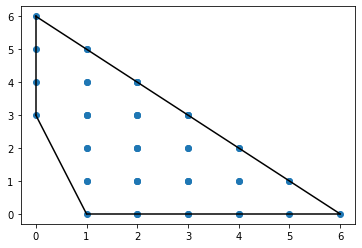

In [410]:
import matplotlib.pyplot as plt

plt.plot(conv_points[:,0], conv_points[:,1], 'o')

for simplex in hull.simplices:

    plt.plot(conv_points[simplex, 0], conv_points[simplex, 1], 'k-')

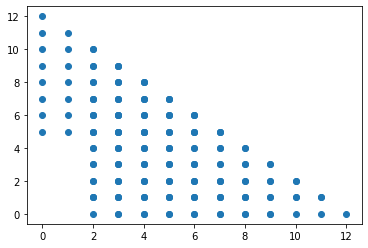

In [411]:
plt.scatter(xs, ys)

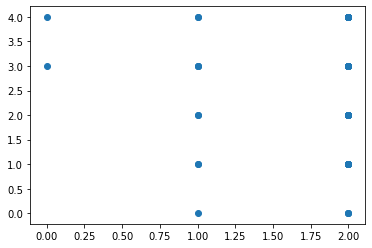

In [412]:
plt.scatter(xns, yns)

In [481]:
# implementing algorithm 1 in 2 dimensional indeterminates in a faster/ generalized way
def find_support(f, Supp): 
    terms_f = f.terms()
    for term in terms_f:
        Supp.append(term[0])
    return Supp

# define the variables
x, y = sp.symbols('x y')
syms_list = [x, y]

#define the max term (upper bound)
ordering = (x, y)
max_degs = np.array([0, 8])
max_term = np.prod(syms_list**max_degs)

# define the polynomail f
f = sp.Poly(-x**3 - x*y**2, (x, y))
    
#define the ideal and find the Groebner basis
I = [x**3 + y**2]
G = sp.groebner(I, x, y, order='grlex')
G = list(G)

#finding the support of f 
f_bar = sp.reduced(f, G, order='grlex')[1]
Supp = []
Supp = find_support(f_bar, Supp)

#define x and y degree matrices for looping 
degree_lists = []
for a_symbol in syms_list: 
    degree_lists.append(np.linspace(0, 15, 16))

all_beta = np.array(np.meshgrid(*degree_lists)).T.reshape(-1, len(degree_lists))

            
for g in G: 
    for beta_i in all_beta: 
        beta = np.array(beta_i, dtype='int')
        assert len(beta) == len(syms_list)
        curr_term = np.prod(syms_list**beta)
        comp_poly = sp.Poly(curr_term+max_term, ordering)
        comp_LT = sp.LT(comp_poly, order='grlex')
        
        if comp_LT-max_term == 0 or np.sum(max_degs)==np.sum(beta): 
            check_poly = sp.Poly(curr_term*g, ordering)
            new_LT = sp.LT(check_poly, order='grlex')
            comp_poly = sp.Poly(new_LT+max_term, ordering)
            comp_LT = sp.LT(comp_poly, order='grlex')
            if comp_LT-max_term==0 or sum(sp.degree_list(new_LT))==np.sum(max_degs): 
                Supp = find_support(check_poly, Supp)

xs = []
ys = []
for elem in Supp: 
    xs.append(elem[0])
    ys.append(elem[1])
    
points = np.array([xs, ys]).T

points_new = points/2

conv_points = []
for point in points_new: 
    int_point = np.array(point, dtype='int')
    compare = int_point == point
    if sum(compare) == len(point): 
        conv_points.append(point)
conv_points = np.array(conv_points)

hull = scipy.spatial.ConvexHull(conv_points)

Nupp = []
for point in conv_points: 
    b1 = int(point[0])
    b2 = int(point[1])
    
    monomial = sp.Poly(x**b1*y**b2, (x, y))
   
    monomial_bar = sp.reduced(monomial, G, order='grlex')[1]

    Nupp = find_support(monomial_bar, Nupp)
    
xns = []
yns = []
for elem in Nupp: 
    xns.append(elem[0])
    yns.append(elem[1])

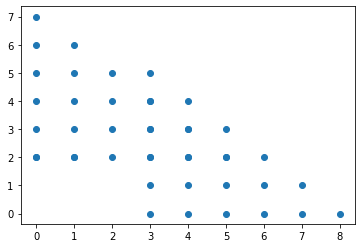

In [482]:
plt.scatter(xs, ys)

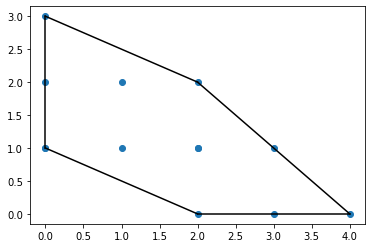

In [483]:
import matplotlib.pyplot as plt

plt.plot(conv_points[:,0], conv_points[:,1], 'o')

for simplex in hull.simplices:

    plt.plot(conv_points[simplex, 0], conv_points[simplex, 1], 'k-')

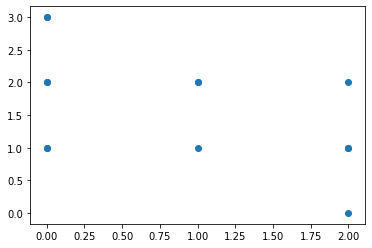

In [484]:
plt.scatter(xns, yns)

In [500]:
fin_points = np.array([xns, yns]).T

In [505]:
fin_points

array([[0, 1],
       [0, 1],
       [0, 2],
       [0, 3],
       [2, 0],
       [2, 1],
       [2, 2],
       [1, 1],
       [1, 2],
       [0, 2],
       [0, 3],
       [2, 1],
       [1, 2]])

In [506]:
fin_points = np.unique(fin_points, axis=0)
fin_points

array([[0, 1],
       [0, 2],
       [0, 3],
       [1, 1],
       [1, 2],
       [2, 0],
       [2, 1],
       [2, 2]])

In [507]:
monomial_vec = []
for i in range(len(fin_points)): 
    monomial_vec.append(x**fin_points[i, 0]*y**fin_points[i, 1])
monomial_vec = sp.Matrix(monomial_vec)

In [508]:
Q = sp.MatrixSymbol('Q', len(monomial_vec), len(monomial_vec))

In [509]:
eqn = monomial_vec.T@sp.Matrix(Q)@monomial_vec

In [512]:
eeee = eqn[0]

In [516]:
monomial_vec

Matrix([
[        y],
[     y**2],
[     y**3],
[      x*y],
[   x*y**2],
[     x**2],
[   x**2*y],
[x**2*y**2]])

In [513]:
sp.simplify(eeee)

x**2*y**2*(x**2*y**2*Q[7, 7] + x**2*y*Q[6, 7] + x**2*Q[5, 7] + x*y**2*Q[4, 7] + x*y*Q[3, 7] + y**3*Q[2, 7] + y**2*Q[1, 7] + y*Q[0, 7]) + x**2*y*(x**2*y**2*Q[7, 6] + x**2*y*Q[6, 6] + x**2*Q[5, 6] + x*y**2*Q[4, 6] + x*y*Q[3, 6] + y**3*Q[2, 6] + y**2*Q[1, 6] + y*Q[0, 6]) + x**2*(x**2*y**2*Q[7, 5] + x**2*y*Q[6, 5] + x**2*Q[5, 5] + x*y**2*Q[4, 5] + x*y*Q[3, 5] + y**3*Q[2, 5] + y**2*Q[1, 5] + y*Q[0, 5]) + x*y**2*(x**2*y**2*Q[7, 4] + x**2*y*Q[6, 4] + x**2*Q[5, 4] + x*y**2*Q[4, 4] + x*y*Q[3, 4] + y**3*Q[2, 4] + y**2*Q[1, 4] + y*Q[0, 4]) + x*y*(x**2*y**2*Q[7, 3] + x**2*y*Q[6, 3] + x**2*Q[5, 3] + x*y**2*Q[4, 3] + x*y*Q[3, 3] + y**3*Q[2, 3] + y**2*Q[1, 3] + y*Q[0, 3]) + y**3*(x**2*y**2*Q[7, 2] + x**2*y*Q[6, 2] + x**2*Q[5, 2] + x*y**2*Q[4, 2] + x*y*Q[3, 2] + y**3*Q[2, 2] + y**2*Q[1, 2] + y*Q[0, 2]) + y**2*(x**2*y**2*Q[7, 1] + x**2*y*Q[6, 1] + x**2*Q[5, 1] + x*y**2*Q[4, 1] + x*y*Q[3, 1] + y**3*Q[2, 1] + y**2*Q[1, 1] + y*Q[0, 1]) + y*(x**2*y**2*Q[7, 0] + x**2*y*Q[6, 0] + x**2*Q[5, 0] + x*y**2*Q[4, 0

In [514]:
f_bar

Poly(-x*y**2 + y**2, x, y, domain='ZZ')

In [535]:
prog = MathematicalProgram()
x = prog.NewIndeterminates(1, 'x')[0]
y = prog.NewIndeterminates(1, 'y')[0]

monomial_vec = np.array([y, y**2, y**3, x*y, x*y**2, x**2, x**2*y, x**2*y**2])

Q = prog.NewContinuousVariables(8, 8, 'Q')

polynom = monomial_vec.T@Q@monomial_vec

fb = -x*y**2 + y**2

prog.AddEqualityConstraintBetweenPolynomials(Polynomial(polynom), Polynomial(fb))

prog.AddPositiveSemidefiniteConstraint(Q)
result = Solve(prog)


In [536]:
np.linalg.eigvals(result.GetSolution(Q))

array([-4.31597404e-02+0.j       ,  1.39217152e+00+0.j       ,
        6.16178547e-01+0.j       ,  7.80769673e-01+0.j       ,
        7.42252962e-01+0.j       ,  9.24513179e-01+0.j       ,
        1.63253971e-06+0.0015505j,  1.63253971e-06-0.0015505j])

In [537]:
print(result.GetSolution(Q))

[[ 1.00000000e+00  2.97473259e-16 -7.42244628e-01 -8.06281992e-01
   5.17566445e-16  3.89166107e-20 -4.38988283e-01  1.02607076e-16]
 [-2.28439273e-16  7.42239672e-01  9.53144988e-20  5.17566445e-16
  -1.23045668e-03 -4.38988283e-01  1.02607076e-16 -4.62268886e-01]
 [ 4.95823202e-06 -6.39839838e-20  1.87422001e-09 -1.23045668e-03
  -2.98556397e-20  1.02607076e-16 -4.62268886e-01  2.00787649e-25]
 [-1.93718006e-01 -1.05183916e-15  7.16953758e-06  9.64502235e-01
   1.02607076e-16  3.55320562e-20  1.02724311e-03  2.76336298e-17]
 [-3.75827748e-17  2.45374382e-03  2.92770725e-20 -3.00291093e-17
   9.24529731e-01  1.02724311e-03  2.76336298e-17  1.02237416e-06]
 [-3.41799056e-20  5.50870567e-06  1.17578516e-24 -4.47558937e-20
  -1.85517342e-06  1.87422001e-09 -4.29531607e-20 -7.81457767e-01]
 [-8.65311755e-02 -4.15575541e-16  2.84658075e-06 -2.05263105e-03
  -5.05293937e-17  3.31960966e-20  7.81457768e-01 -4.29900800e-20]
 [-4.27792850e-20  5.19634283e-06  2.13852974e-24 -1.31148048e-20
  -

In [518]:
polynom

<Expression "((x(0) * y(0) * ((x(0) * y(0) * Q(3,3)) + (x(0) * pow(y(0), 2) * Q(4,3)) + (pow(x(0), 2) * y(0) * Q(6,3)) + (pow(x(0), 2) * pow(y(0), 2) * Q(7,3)) + (pow(x(0), 2) * Q(5,3)) + (y(0) * Q(0,3)) + (pow(y(0), 2) * Q(1,3)) + (pow(y(0), 3) * Q(2,3)))) + (x(0) * pow(y(0), 2) * ((x(0) * y(0) * Q(3,4)) + (x(0) * pow(y(0), 2) * Q(4,4)) + (pow(x(0), 2) * y(0) * Q(6,4)) + (pow(x(0), 2) * pow(y(0), 2) * Q(7,4)) + (pow(x(0), 2) * Q(5,4)) + (y(0) * Q(0,4)) + (pow(y(0), 2) * Q(1,4)) + (pow(y(0), 3) * Q(2,4)))) + (pow(x(0), 2) * y(0) * ((x(0) * y(0) * Q(3,6)) + (x(0) * pow(y(0), 2) * Q(4,6)) + (pow(x(0), 2) * y(0) * Q(6,6)) + (pow(x(0), 2) * pow(y(0), 2) * Q(7,6)) + (pow(x(0), 2) * Q(5,6)) + (y(0) * Q(0,6)) + (pow(y(0), 2) * Q(1,6)) + (pow(y(0), 3) * Q(2,6)))) + (pow(x(0), 2) * pow(y(0), 2) * ((x(0) * y(0) * Q(3,7)) + (x(0) * pow(y(0), 2) * Q(4,7)) + (pow(x(0), 2) * y(0) * Q(6,7)) + (pow(x(0), 2) * pow(y(0), 2) * Q(7,7)) + (pow(x(0), 2) * Q(5,7)) + (y(0) * Q(0,7)) + (pow(y(0), 2) * Q(1,7)) 

In [463]:
a = np.array([1, 2])
b = np.array([3, 4])
c = np.array([5, 6])

e = [a, b, c]

d = np.array(np.meshgrid(*e)).T.reshape(-1, 3)

In [470]:
llll = [x, y]**d[0][0:2]

In [475]:
np.prod(llll)

x*y**3

In [469]:
d[0]

array([1, 3, 5])

In [425]:
ll = [1, 2, 3, 4]

In [434]:
pp = [k*1 for k in ll]

In [435]:
pp

[1, 2, 3, 4]